In [1]:
# ref: https://foundations.projectpythia.org/core/xarray.html

### content
* Introduction to Xarray
* Computations and Masks with Xarray
* Calculating ENSO with Xarray

### Content of INtorduction to Xarray
- Overview
- Prerequisites
- Imports
- Introducing the DataArray and Dataset
    - Creation of a DataArray object
    - Create a DataArray with named Coordinates
        - Make time and space coordinates
        - Initialize the DataArray with complete coordinate info
        - Set useful attributes
        - Attributes are not preserved by default!
    - The Dataset : a container for DataArray s with shared coordinates
- Subsetting and selection by coordinate values
- Opening netCDF data
- Plotting with Xarray
- Summary
- Resources and references


### Overview
This notebook will introduce the basics of gridded, labeled data with Xarray. Since Xarray introduces additional abstractions on top of plain arrays of data, our goal is to show why these abstractions are useful and how they frequently lead to simpler, more robust code.

We’ll cover these topics:

- Create a DataArray, one of the core object types in Xarray

- Understand how to use named coordinates and metadata in a DataArray

- Combine individual DataArrays into a Dataset, the other core object type in Xarray

- Subset, slice, and interpolate the data using named coordinates

- Open netCDF data using XArray

- Basic subsetting and aggregation of a Dataset

- Brief introduction to plotting with Xarray

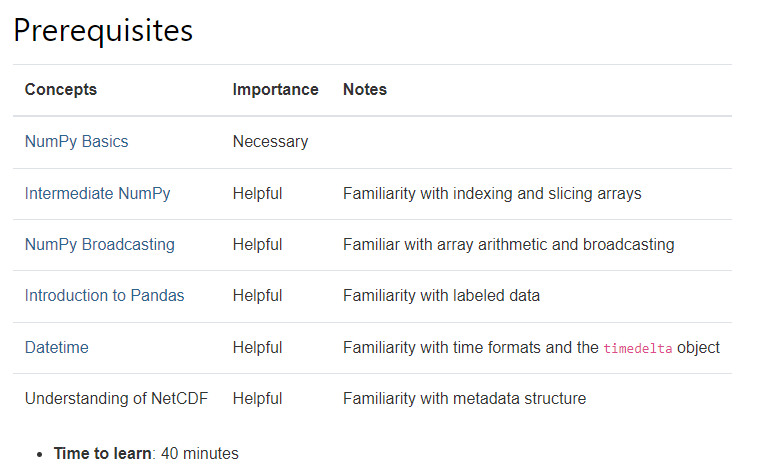

### Imports
Simmilar to numpy, np; pandas, pd; you may often encounter xarray imported within a shortened namespace as xr. pythia_datasets provides example data for us to work with.

In [2]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
from pythia_datasets import DATASETS  # conda install -c conda-forge pythia-datasets

### Introducing the DataArray and Dataset
Xarray expands on the capabilities on NumPy arrays, providing a lot of streamlined data manipulation. It is similar in that respect to Pandas, but whereas Pandas excels at working with tabular data, Xarray is focused on N-dimensional arrays of data (i.e. grids). Its interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces to provide functionality similar to netCDF-java’s Common Data Model (CDM).

### Creation of a DataArray object
The DataArray is one of the basic building blocks of Xarray (see docs here). It provides a numpy.ndarray-like object that expands to provide two critical pieces of functionality:

Coordinate names and values are stored with the data, making slicing and indexing much more powerful

It has a built-in container for attributes

Here we’ll initialize a DataArray object by wrapping a plain NumPy array, and explore a few of its properties.

Generate a random numpy array
For our first example, we’ll just create a random array of “temperature” data in units of Kelvin:

In [3]:
data = 283 + 5 * np.random.randn(5, 3, 4)
data

array([[[282.13200181, 279.27904494, 282.26096791, 288.54421331],
        [284.84929594, 288.81901585, 281.0956695 , 290.12663557],
        [281.89037538, 284.77488427, 282.61768195, 282.89128252]],

       [[278.37214135, 281.86271559, 294.89287799, 277.77261089],
        [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
        [284.11760408, 284.46926554, 287.7611379 , 284.62824128]],

       [[287.77355065, 273.90732455, 270.19320784, 278.47689353],
        [276.76706898, 273.87631075, 288.53151035, 278.79831799],
        [285.83905643, 293.4630377 , 285.17993318, 280.96471772]],

       [[281.01011117, 279.4994867 , 285.53224812, 283.66484631],
        [282.83937643, 276.75690595, 275.63130715, 273.50047558],
        [279.98015339, 284.30360388, 285.77932184, 280.7824785 ]],

       [[284.20449933, 281.14084253, 278.78869158, 269.10473162],
        [270.36746312, 277.48289597, 286.74564615, 281.54573603],
        [287.11282265, 286.00293478, 289.09555464, 274.00834092]]])

In [5]:
# note the data shape
data.shape

(5, 3, 4)

### Wrap the array: first attempt
Now we create a basic DataArray just by passing our plain data as input:

In [4]:
temp = xr.DataArray(data)
temp

<xarray.DataArray (dim_0: 5, dim_1: 3, dim_2: 4)>
array([[[282.13200181, 279.27904494, 282.26096791, 288.54421331],
        [284.84929594, 288.81901585, 281.0956695 , 290.12663557],
        [281.89037538, 284.77488427, 282.61768195, 282.89128252]],

       [[278.37214135, 281.86271559, 294.89287799, 277.77261089],
        [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
        [284.11760408, 284.46926554, 287.7611379 , 284.62824128]],

       [[287.77355065, 273.90732455, 270.19320784, 278.47689353],
        [276.76706898, 273.87631075, 288.53151035, 278.79831799],
        [285.83905643, 293.4630377 , 285.17993318, 280.96471772]],

       [[281.01011117, 279.4994867 , 285.53224812, 283.66484631],
        [282.83937643, 276.75690595, 275.63130715, 273.50047558],
        [279.98015339, 284.30360388, 285.77932184, 280.7824785 ]],

       [[284.20449933, 281.14084253, 278.78869158, 269.10473162],
        [270.36746312, 277.48289597, 286.74564615, 281.54573603],
        [287.11282265, 286.00293478, 289.09555464, 274.00834092]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

Note two things:

Xarray generates some basic dimension names for us (dim_0, dim_1, dim_2). We’ll improve this with better names in the next example.

Wrapping the numpy array in a DataArray gives us a rich display in the notebook! (Try clicking the array symbol to expand or collapse the view)

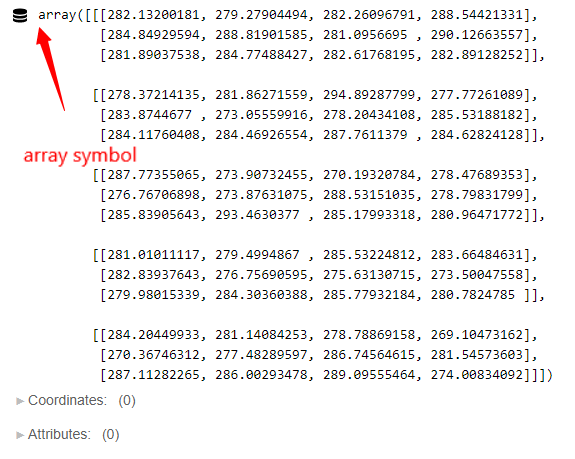

### Assign dimension names
Much of the power of Xarray comes from making use of named dimensions. So let’s add some more useful names! We can do that by passing an ordered list of names using the keyword argument dims:

In [6]:
temp = xr.DataArray(data, dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[282.13200181, 279.27904494, 282.26096791, 288.54421331],
        [284.84929594, 288.81901585, 281.0956695 , 290.12663557],
        [281.89037538, 284.77488427, 282.61768195, 282.89128252]],

       [[278.37214135, 281.86271559, 294.89287799, 277.77261089],
        [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
        [284.11760408, 284.46926554, 287.7611379 , 284.62824128]],

       [[287.77355065, 273.90732455, 270.19320784, 278.47689353],
        [276.76706898, 273.87631075, 288.53151035, 278.79831799],
        [285.83905643, 293.4630377 , 285.17993318, 280.96471772]],

       [[281.01011117, 279.4994867 , 285.53224812, 283.66484631],
        [282.83937643, 276.75690595, 275.63130715, 273.50047558],
        [279.98015339, 284.30360388, 285.77932184, 280.7824785 ]],

       [[284.20449933, 281.14084253, 278.78869158, 269.10473162],
        [270.36746312, 277.48289597, 286.74564615, 281.54573603],
        [287.11282265, 286.00293478, 289.09555464, 274.00834092]]])
Dimensions without coordinates: time, lat, lon

This is already improved upon from a NumPy array, because we have names for each of the dimensions (or axes in NumPy parlance). Even better, we can take arrays representing the values for the coordinates for each of these dimensions and associate them with the data when we create the DataArray. We’ll see this in the next example.

### Create a DataArray with named Coordinates
Make time and space coordinates

Here we will use Pandas to create an array of datetime data, which we will then use to create a DataArray with a named coordinate time.

In [7]:
times = pd.date_range('2018-01-01', periods=5)
times

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

We’ll also create arrays to represent sample longitude and latitude:

In [8]:
lons = np.linspace(-120, -60, 4)
lats = np.linspace(25, 55, 3)

In [11]:
# verify
print(lons)
print(lats)

[-120. -100.  -80.  -60.]
[25. 40. 55.]


### Initialize the DataArray with complete coordinate info

When we create the DataArray instance, we pass in the arrays we just created:

In [9]:
temp = xr.DataArray(data, coords=[times, lats, lons], dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[282.13200181, 279.27904494, 282.26096791, 288.54421331],
        [284.84929594, 288.81901585, 281.0956695 , 290.12663557],
        [281.89037538, 284.77488427, 282.61768195, 282.89128252]],

       [[278.37214135, 281.86271559, 294.89287799, 277.77261089],
        [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
        [284.11760408, 284.46926554, 287.7611379 , 284.62824128]],

       [[287.77355065, 273.90732455, 270.19320784, 278.47689353],
        [276.76706898, 273.87631075, 288.53151035, 278.79831799],
        [285.83905643, 293.4630377 , 285.17993318, 280.96471772]],

       [[281.01011117, 279.4994867 , 285.53224812, 283.66484631],
        [282.83937643, 276.75690595, 275.63130715, 273.50047558],
        [279.98015339, 284.30360388, 285.77932184, 280.7824785 ]],

       [[284.20449933, 281.14084253, 278.78869158, 269.10473162],
        [270.36746312, 277.48289597, 286.74564615, 281.54573603],
        [287.11282265, 286.00293478, 289.09555464, 274.00834092]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

### Set useful attributes
…and while we’re at it, we can also set some attribute metadata:

In [12]:
temp.attrs['units'] = 'kelvin'
temp.attrs['standard_name'] = 'air_temperature'

temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[282.13200181, 279.27904494, 282.26096791, 288.54421331],
        [284.84929594, 288.81901585, 281.0956695 , 290.12663557],
        [281.89037538, 284.77488427, 282.61768195, 282.89128252]],

       [[278.37214135, 281.86271559, 294.89287799, 277.77261089],
        [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
        [284.11760408, 284.46926554, 287.7611379 , 284.62824128]],

       [[287.77355065, 273.90732455, 270.19320784, 278.47689353],
        [276.76706898, 273.87631075, 288.53151035, 278.79831799],
        [285.83905643, 293.4630377 , 285.17993318, 280.96471772]],

       [[281.01011117, 279.4994867 , 285.53224812, 283.66484631],
        [282.83937643, 276.75690595, 275.63130715, 273.50047558],
        [279.98015339, 284.30360388, 285.77932184, 280.7824785 ]],

       [[284.20449933, 281.14084253, 278.78869158, 269.10473162],
        [270.36746312, 277.48289597, 286.74564615, 281.54573603],
        [287.11282265, 286.00293478, 289.09555464, 274.00834092]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

### Attributes are not preserved by default!
Notice what happens if we perform a mathematical operaton with the DataArray: the coordinate values persist, but the attributes are lost. This is done because it is very challenging to know if the attribute metadata is still correct or appropriate after arbitrary arithmetic operations.

To illustrate this, we’ll do a simple unit conversion from Kelvin to Celsius:

In [13]:
temp_in_celsius = temp - 273.15
temp_in_celsius

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[ 8.98200181,  6.12904494,  9.11096791, 15.39421331],
        [11.69929594, 15.66901585,  7.9456695 , 16.97663557],
        [ 8.74037538, 11.62488427,  9.46768195,  9.74128252]],

       [[ 5.22214135,  8.71271559, 21.74287799,  4.62261089],
        [10.7244677 , -0.09440084,  5.05434108, 12.38188182],
        [10.96760408, 11.31926554, 14.6111379 , 11.47824128]],

       [[14.62355065,  0.75732455, -2.95679216,  5.32689353],
        [ 3.61706898,  0.72631075, 15.38151035,  5.64831799],
        [12.68905643, 20.3130377 , 12.02993318,  7.81471772]],

       [[ 7.86011117,  6.3494867 , 12.38224812, 10.51484631],
        [ 9.68937643,  3.60690595,  2.48130715,  0.35047558],
        [ 6.83015339, 11.15360388, 12.62932184,  7.6324785 ]],

       [[11.05449933,  7.99084253,  5.63869158, -4.04526838],
        [-2.78253688,  4.33289597, 13.59564615,  8.39573603],
        [13.96282265, 12.85293478, 15.94555464,  0.85834092]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

For an in-depth discussion of how Xarray handles metadata, start in the Xarray docs here.

### The Dataset: a container for DataArrays with shared coordinates
Along with DataArray, the other key object type in Xarray is the Dataset: a dictionary-like container that holds one or more DataArrays, which can also optionally share coordinates (see docs here).

The most common way to create a Dataset object is to load data from a file (see below). Here, instead, we will create another DataArray and combine it with our temp data.

This will illustrate how the information about common coordinate axes is used.

### Create a pressure DataArray using the same coordinates
This code mirrors how we created the temp object above.

In [14]:
pressure_data = 1000.0 + 5 * np.random.randn(5, 3, 4)
pressure = xr.DataArray(
    pressure_data, coords=[times, lats, lons], dims=['time', 'lat', 'lon']
)
pressure.attrs['units'] = 'hPa'
pressure.attrs['standard_name'] = 'air_pressure'

pressure

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[1007.21341339, 1006.49686622,  997.73246984,  998.69293223],
        [ 998.46853619, 1003.57511223,  993.99672441, 1001.92097878],
        [ 996.07166418, 1020.10682663,  990.09107403, 1002.37577933]],

       [[1012.2754133 , 1007.28441294,  995.73784458,  994.38800699],
        [1003.99954774,  990.41779431, 1000.63971681,  998.60084875],
        [ 995.65472474,  999.37622236, 1010.23382006, 1003.32786659]],

       [[1003.33011816, 1002.64245021, 1003.42824962, 1012.56824528],
        [ 999.64873115,  999.43675731, 1001.75396653, 1005.9902162 ],
        [1000.0290424 ,  996.44659338,  991.04609342,  997.71961058]],

       [[ 997.27049756, 1001.83193314,  998.9591621 , 1003.36540287],
        [ 992.99667282, 1001.49434294,  998.88326068, 1002.7253288 ],
        [ 994.96735412,  996.18557745, 1002.33347999, 1003.33274588]],

       [[ 999.04996538, 1003.52223707, 1004.67082959, 1000.55782389],
        [1001.46241124, 1006.67494296, 1001.2603273 , 1000.57177989],
        [ 999.86661457, 1007.74244695,  984.78942866, 1002.40454401]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

### Create a Dataset object
Each DataArray in our Dataset needs a name!

The most straightforward way to create a Dataset with our temp and pressure arrays is to pass a dictionary using the keyword argument data_vars:

In [15]:
ds = xr.Dataset(data_vars={'Temperature': temp, 'Pressure': pressure})
ds

<xarray.Dataset>
Dimensions:      (time: 5, lat: 3, lon: 4)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat          (lat) float64 25.0 40.0 55.0
  * lon          (lon) float64 -120.0 -100.0 -80.0 -60.0
Data variables:
    Temperature  (time, lat, lon) float64 282.1 279.3 282.3 ... 289.1 274.0
    Pressure     (time, lat, lon) float64 1.007e+03 1.006e+03 ... 1.002e+03

Notice that the Dataset object ds is aware that both data arrays sit on the same coordinate axes.

In [16]:
# TODO (done): self-reflection: what's the difference dataset vs. data array


immature answer: consider the statement "Notice that the Dataset object ds is aware that both data arrays sit on the same coordinate axes." And use empirical approach, observe that
- Note that for dataset (ds) it has 2 data variables (i.e., Temperature and Pressure) which are considered two data array
- Note the "(time, lat, lon)" is in accordance to the coordinates time, lat, lon, hence the statement "sit on the same coordinate axes"

### Access Data variables and Coordinates in a Dataset
We can pull out any of the individual DataArray objects in a few different ways.

Using the “dot” notation:

In [28]:
# insights: this is much like Pandas to access columns
ds.Pressure

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[1007.21341339, 1006.49686622,  997.73246984,  998.69293223],
        [ 998.46853619, 1003.57511223,  993.99672441, 1001.92097878],
        [ 996.07166418, 1020.10682663,  990.09107403, 1002.37577933]],

       [[1012.2754133 , 1007.28441294,  995.73784458,  994.38800699],
        [1003.99954774,  990.41779431, 1000.63971681,  998.60084875],
        [ 995.65472474,  999.37622236, 1010.23382006, 1003.32786659]],

       [[1003.33011816, 1002.64245021, 1003.42824962, 1012.56824528],
        [ 999.64873115,  999.43675731, 1001.75396653, 1005.9902162 ],
        [1000.0290424 ,  996.44659338,  991.04609342,  997.71961058]],

       [[ 997.27049756, 1001.83193314,  998.9591621 , 1003.36540287],
        [ 992.99667282, 1001.49434294,  998.88326068, 1002.7253288 ],
        [ 994.96735412,  996.18557745, 1002.33347999, 1003.33274588]],

       [[ 999.04996538, 1003.52223707, 1004.67082959, 1000.55782389],
        [1001.46241124, 1006.67494296, 1001.2603273 , 1000.57177989],
        [ 999.86661457, 1007.74244695,  984.78942866, 1002.40454401]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

In [ ]:
# thoughts: use Pandas (tabular) analogy, 
# column in pandas <--> variable in xarray, 
# row in pandas (1d) <--> coordinate (nd) in xarray

# TODO: reason/show/elaborate that the aforementioned thoughts make sense.
# TODO: explore: what if the dimension/coordinate size/shape for each variable do not match, does it matter?
#     e.g., for pressure it has (time: 5, lat: 3, lon: 4) while for temperature it has (time: 50, lat: 30, lon: 40) 

In [18]:
ds['Pressure']

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[1007.21341339, 1006.49686622,  997.73246984,  998.69293223],
        [ 998.46853619, 1003.57511223,  993.99672441, 1001.92097878],
        [ 996.07166418, 1020.10682663,  990.09107403, 1002.37577933]],

       [[1012.2754133 , 1007.28441294,  995.73784458,  994.38800699],
        [1003.99954774,  990.41779431, 1000.63971681,  998.60084875],
        [ 995.65472474,  999.37622236, 1010.23382006, 1003.32786659]],

       [[1003.33011816, 1002.64245021, 1003.42824962, 1012.56824528],
        [ 999.64873115,  999.43675731, 1001.75396653, 1005.9902162 ],
        [1000.0290424 ,  996.44659338,  991.04609342,  997.71961058]],

       [[ 997.27049756, 1001.83193314,  998.9591621 , 1003.36540287],
        [ 992.99667282, 1001.49434294,  998.88326068, 1002.7253288 ],
        [ 994.96735412,  996.18557745, 1002.33347999, 1003.33274588]],

       [[ 999.04996538, 1003.52223707, 1004.67082959, 1000.55782389],
        [1001.46241124, 1006.67494296, 1001.2603273 , 1000.57177989],
        [ 999.86661457, 1007.74244695,  984.78942866, 1002.40454401]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

In [19]:
ds['Pressure']

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)>
array([[[1007.21341339, 1006.49686622,  997.73246984,  998.69293223],
        [ 998.46853619, 1003.57511223,  993.99672441, 1001.92097878],
        [ 996.07166418, 1020.10682663,  990.09107403, 1002.37577933]],

       [[1012.2754133 , 1007.28441294,  995.73784458,  994.38800699],
        [1003.99954774,  990.41779431, 1000.63971681,  998.60084875],
        [ 995.65472474,  999.37622236, 1010.23382006, 1003.32786659]],

       [[1003.33011816, 1002.64245021, 1003.42824962, 1012.56824528],
        [ 999.64873115,  999.43675731, 1001.75396653, 1005.9902162 ],
        [1000.0290424 ,  996.44659338,  991.04609342,  997.71961058]],

       [[ 997.27049756, 1001.83193314,  998.9591621 , 1003.36540287],
        [ 992.99667282, 1001.49434294,  998.88326068, 1002.7253288 ],
        [ 994.96735412,  996.18557745, 1002.33347999, 1003.33274588]],

       [[ 999.04996538, 1003.52223707, 1004.67082959, 1000.55782389],
        [1001.46241124, 1006.67494296, 1001.2603273 , 1000.57177989],
        [ 999.86661457, 1007.74244695,  984.78942866, 1002.40454401]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

We’ll return to the Dataset object when we start loading data from files.

### Subsetting and selection by coordinate values
Much of the power of labeled coordinates comes from the ability to select data based on coordinate names and values, rather than array indices. We’ll explore this briefly here.

### NumPy-like selection
Suppose we want to extract all the spatial data for one single date: January 2, 2018. It’s possible to achieve that with NumPy-like index selection:

In [20]:
indexed_selection = temp[1, :, :]  # Index 1 along axis 0 is the time slice we want...
indexed_selection

<xarray.DataArray (lat: 3, lon: 4)>
array([[278.37214135, 281.86271559, 294.89287799, 277.77261089],
       [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
       [284.11760408, 284.46926554, 287.7611379 , 284.62824128]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

HOWEVER, notice that this requires us (the user / programmer) to have **detailed knowledge** of the order of the axes and the meaning of the indices along those axes!

**Named coordinates free us from this burden…**

### Selecting with .sel()
We can instead select data based on coordinate values using the .sel() method, which takes one or more named coordinate(s) as keyword argument:

In [21]:
named_selection = temp.sel(time='2018-01-02')
named_selection

<xarray.DataArray (lat: 3, lon: 4)>
array([[278.37214135, 281.86271559, 294.89287799, 277.77261089],
       [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
       [284.11760408, 284.46926554, 287.7611379 , 284.62824128]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In [23]:
# verify that temp[1] == '2018-01-02'
print(temp.time[1])
temp.time

<xarray.DataArray 'time' ()>
array('2018-01-02T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-01-02


<xarray.DataArray 'time' (time: 5)>
array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05

We got the same result, but

- we didn’t have to know anything about how the array was created or stored

- our code is agnostic about how many dimensions we are dealing with

- the intended meaning of our code is much clearer!

### Approximate selection and interpolation
With time and space data, we frequently want to sample “near” the coordinate points in our dataset. Here are a few simple ways to achieve that.

### Nearest-neighbor sampling
Suppose we want to sample the nearest datapoint within 2 days of date 2018-01-07. Since the last day on our time axis is 2018-01-05, this is well-posed.

.sel has the flexibility to perform nearest neighbor sampling, taking an optional tolerance:

In [25]:
temp.sel(time='2018-01-07', method='nearest', tolerance=timedelta(days=2))

<xarray.DataArray (lat: 3, lon: 4)>
array([[284.20449933, 281.14084253, 278.78869158, 269.10473162],
       [270.36746312, 277.48289597, 286.74564615, 281.54573603],
       [287.11282265, 286.00293478, 289.09555464, 274.00834092]])
Coordinates:
    time     datetime64[ns] 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

where we see that .sel indeed pulled out the data for date 2018-01-05.

In [27]:
# verify with nearest date, i.e., 2018-01-05, i.e., the last one
temp[-1, ]

<xarray.DataArray (lat: 3, lon: 4)>
array([[284.20449933, 281.14084253, 278.78869158, 269.10473162],
       [270.36746312, 277.48289597, 286.74564615, 281.54573603],
       [287.11282265, 286.00293478, 289.09555464, 274.00834092]])
Coordinates:
    time     datetime64[ns] 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

### Interpolation
Suppose we want to extract a timeseries for Boulder (40°N, 105°W). Since lon=-105 is not a point on our longitude axis, this requires interpolation between data points.

The .interp() method (see the docs here) works similarly to .sel(). Using .interp(), we can interpolate to any latitude/longitude location:

In [29]:
temp.interp(lon=-105, lat=40)

<xarray.DataArray (time: 5)>
array([287.82658587, 275.7603163 , 274.59900031, 278.27752357,
       275.70403776])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
    lon      int32 -105
    lat      int32 40
Attributes:
    units:          kelvin
    standard_name:  air_temperature

### Info

Xarray’s interpolation functionality requires the SciPy package!

### Slicing along coordinates
Frequently we want to **select a range** (or slice) along one or more coordinate(s). We can achieve this by passing a Python slice object to .sel(), as follows:

In [30]:
temp.sel(
    time=slice('2018-01-01', '2018-01-03'), lon=slice(-110, -70), lat=slice(25, 45)
)

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[279.27904494, 282.26096791],
        [288.81901585, 281.0956695 ]],

       [[281.86271559, 294.89287799],
        [273.05559916, 278.20434108]],

       [[273.90732455, 270.19320784],
        [273.87631075, 288.53151035]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In [35]:
# playground
# note slice is a Python method, (normally you will see index slicing with number, e.g., a = [1, 4, 5]; a[:1] # => [1])
# slice('2018-01-01', '2018-01-03')
a = [1, 4, 5]; a[:1]

[1]

### Info

The calling sequence for slice always looks like slice(start, stop[, step]), where step is optional.

Notice how the length of each coordinate axis has changed due to our slicing.

### One more selection method: .loc
All of these operations can also be done within square brackets on the .loc attribute of the DataArray:

In [36]:
temp.loc['2018-01-02']

<xarray.DataArray (lat: 3, lon: 4)>
array([[278.37214135, 281.86271559, 294.89287799, 277.77261089],
       [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
       [284.11760408, 284.46926554, 287.7611379 , 284.62824128]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

This is sort of in between the NumPy-style selection

In [37]:
temp[1,:,:]

<xarray.DataArray (lat: 3, lon: 4)>
array([[278.37214135, 281.86271559, 294.89287799, 277.77261089],
       [283.8744677 , 273.05559916, 278.20434108, 285.53188182],
       [284.11760408, 284.46926554, 287.7611379 , 284.62824128]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

and the fully label-based selection using .sel()

With .loc, we make use of the coordinate values, but lose the ability to specify the names of the various dimensions. Instead, the slicing must be done in the correct order:

In [38]:
temp.loc['2018-01-01':'2018-01-03', 25:45, -110:-70]

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[279.27904494, 282.26096791],
        [288.81901585, 281.0956695 ]],

       [[281.86271559, 294.89287799],
        [273.05559916, 278.20434108]],

       [[273.90732455, 270.19320784],
        [273.87631075, 288.53151035]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

One advantage of using .loc is that we can use NumPy-style slice notation like 25:45, rather than the more verbose slice(25,45). But of course that also works:

In [40]:
temp.loc['2018-01-01':'2018-01-03', slice(25, 45), -110:-70]

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[279.27904494, 282.26096791],
        [288.81901585, 281.0956695 ]],

       [[281.86271559, 294.89287799],
        [273.05559916, 278.20434108]],

       [[273.90732455, 270.19320784],
        [273.87631075, 288.53151035]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

What doesn’t work is passing the slices in a different order:

In [41]:
# This will generate an error
# temp.loc[-110:-70, 25:45,'2018-01-01':'2018-01-03']

### Opening netCDF data
With its close ties to the netCDF data model, Xarray also supports netCDF as a first-class file format. This means it has easy support for opening netCDF datasets, so long as they conform to some of Xarray’s limitations (such as 1-dimensional coordinates).

### Access netCDF data with xr.open_dataset

### Info

Here we’re getting the data from Project Pythia’s custom library of example data, which we already imported above with from pythia_datasets import DATASETS. The DATASETS.fetch() method will automatically download and cache our example data file NARR_19930313_0000.nc locally.

In [42]:
filepath = DATASETS.fetch('NARR_19930313_0000.nc')

In [43]:
# Once we have a valid path to a data file that Xarray knows how to read, we can open it like this:

In [44]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

### Subsetting the Dataset
Our call to xr.open_dataset() above returned a Dataset object that we’ve decided to call ds. We can then pull out individual fields:

In [45]:
ds.isobaric1

<xarray.DataArray 'isobaric1' (isobaric1: 29)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

(recall that we can also use dictionary syntax like ds['isobaric1'] to do the same thing)

Datasets also support much of the same subsetting operations as DataArray, but will perform the operation on all data:

In [46]:
ds_1000 = ds.sel(isobaric1=1000.0)
ds_1000

<xarray.Dataset>
Dimensions:                       (time1: 1, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
    isobaric1                     float32 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, y, x) float32 ...
    LambertConformal_Projection   int32 0
    lat                           (y, x) float64 17.87 17.96 ... 34.85 34.64
    lon                           (y, x) float64 -135.0 -134.8 ... -43.13 -42.91
    Geopotential_height_isobaric  (time1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, y, x) float32 ...
    Temperature_isobaric          (time1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

In [47]:
# And further subsetting to a single DataArray:

In [48]:
ds_1000.Temperature_isobaric

<xarray.DataArray 'Temperature_isobaric' (time1: 1, y: 119, x: 268)>
array([[[294.09436, 294.1256 , ..., 298.6725 , 298.71936],
        [294.07874, 294.14124, ..., 298.6256 , 298.5475 ],
        ...,
        [276.86   , 276.84436, ..., 289.11   , 289.01624],
        [277.01624, 276.82874, ..., 289.0475 , 288.96936]]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
    isobaric1  float32 1e+03
  * y          (y) float32 -3.117e+03 -3.084e+03 -3.052e+03 ... 681.6 714.1
  * x          (x) float32 -3.324e+03 -3.292e+03 ... 5.311e+03 5.343e+03
Attributes:
    long_name:           Temperature @ Isobaric surface
    units:               K
    description:         Temperature
    grid_mapping:        LambertConformal_Projection
    Grib_Variable_Id:    VAR_7-15-131-11_L100
    Grib1_Center:        7
    Grib1_Subcenter:     15
    Grib1_TableVersion:  131
    Grib1_Parameter:     11
    Grib1_Level_Type:    100
    Grib1_Level_Desc:    Isobaric surface

In [49]:
# note: use .keys() method to find all the info (including variables)
# ref: https://stackoverflow.com/questions/64233568/how-can-i-get-a-list-with-the-variable-names-of-my-xarray-dataset
ds_1000.keys()

KeysView(<xarray.Dataset>
Dimensions:                       (time1: 1, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
    isobaric1                     float32 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, y, x) float32 -5.378 -5.393 ... 7.497
    LambertConformal_Projection   int32 0
    lat                           (y, x) float64 17.87 17.96 ... 34.85 34.64
    lon                           (y, x) float64 -135.0 -134.8 ... -43.13 -42.91
    Geopotential_height_isobaric  (time1, y, x) float32 153.2 153.2 ... 203.7
    v-component_of_wind_isobaric  (time1, y, x) float32 -5.755 -5.74 ... 9.276
    Temperature_isobaric          (time1, y, x) float32 294.1 294.1 ... 289.0
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Origina

In [51]:
ds_1000["u-component_of_wind_isobaric"]

<xarray.DataArray 'u-component_of_wind_isobaric' (time1: 1, y: 119, x: 268)>
array([[[ -5.377701,  -5.393326, ..., -14.471451, -15.330826],
        [ -5.533951,  -5.112076, ..., -15.065201, -15.346451],
        ...,
        [ -3.143326,  -2.705826, ...,   7.794174,   7.091049],
        [ -2.549576,  -2.721451, ...,   8.512924,   7.497299]]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
    isobaric1  float32 1e+03
  * y          (y) float32 -3.117e+03 -3.084e+03 -3.052e+03 ... 681.6 714.1
  * x          (x) float32 -3.324e+03 -3.292e+03 ... 5.311e+03 5.343e+03
Attributes:
    long_name:           u-component of wind @ Isobaric surface
    units:               m s^-1
    description:         u-component of wind
    grid_mapping:        LambertConformal_Projection
    Grib_Variable_Id:    VAR_7-15-131-33_L100
    Grib1_Center:        7
    Grib1_Subcenter:     15
    Grib1_TableVersion:  131
    Grib1_Parameter:     33
    Grib1_Level_Type:    100
    Grib1_Level_Desc:    Isobaric surface

### Aggregation operations
Not only can you use the named dimensions for manual slicing and indexing of data, but you can also use it to control aggregation operations, like std (standard deviation):

In [52]:
u_winds = ds['u-component_of_wind_isobaric']
u_winds.std(dim=['x', 'y'])

<xarray.DataArray 'u-component_of_wind_isobaric' (time1: 1, isobaric1: 29)>
array([[ 8.673963 , 10.212325 , 11.556413 , 12.254429 , 13.372146 ,
        15.472462 , 16.091969 , 15.846294 , 15.195834 , 13.936979 ,
        12.93888  , 12.060708 , 10.972139 ,  9.722328 ,  8.853286 ,
         8.257241 ,  7.679721 ,  7.4516497,  7.2352104,  7.039894 ,
         6.883371 ,  6.7821493,  6.7088237,  6.6865997,  6.7247376,
         6.745023 ,  6.6859775,  6.5107226,  5.972262 ]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

## Info

Aggregation methods for Xarray objects operate over the named coordinate dimension(s) specified by keyword argument dim. Compare to NumPy, where aggregations operate over specified numbered axes.

Using the sample dataset, we can calculate the mean temperature profile (temperature as a function of pressure) over Colorado within this dataset. For this exercise, consider the bounds of Colorado to be:

- x: -182km to 424km

- y: -1450km to -990km

(37°N to 41°N and 102°W to 109°W projected to Lambert Conformal projection coordinates)

In [53]:
temps = ds.Temperature_isobaric
co_temps = temps.sel(x=slice(-182, 424), y=slice(-1450, -990))
prof = co_temps.mean(dim=['x', 'y'])
prof

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric1: 29)>
array([[215.078  , 215.76935, 217.243  , 217.82663, 215.83487, 216.10933,
        219.99902, 224.66118, 228.80576, 234.88701, 238.78503, 242.66309,
        246.44807, 249.26636, 250.84995, 253.37354, 257.0429 , 259.08398,
        260.97955, 262.98364, 264.82138, 266.5198 , 268.22467, 269.7471 ,
        271.18216, 272.66815, 274.13037, 275.54718, 276.97675]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

### Plotting with Xarray
Another major benefit of using labeled data structures is that they enable automated plotting with sensible axis labels.

### Simple visualization with .plot()
Much like we saw in Pandas, Xarray includes an interface to Matplotlib that we can access through the .plot() method of every DataArray.

For quick and easy data exploration, we can just call .plot() without any modifiers:

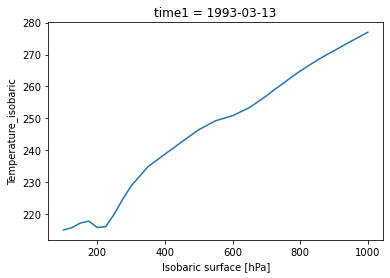

In [54]:
prof.plot()

Here Xarray has generated a line plot of the temperature data against the coordinate variable isobaric. Also the metadata are used to auto-generate axis labels and units.

### Customizing the plot
As in Pandas, the .plot() method is mostly just a wrapper to Matplotlib, so we can customize our plot in familiar ways.

In this air temperature profile example, we would like to make two changes:

- swap the axes so that we have isobaric levels on the y (vertical) axis of the figure

- make pressure decrease upward in the figure, so that up is up

A few keyword arguments to our .plot() call will take care of this:

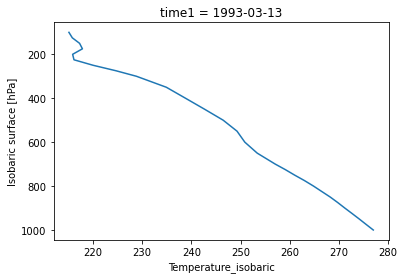

In [57]:
prof.plot(y="isobaric1", yincrease=False)

### Plotting 2D data
In the example above, the .plot() method produced a line plot.

What if we call .plot() on a 2D array?

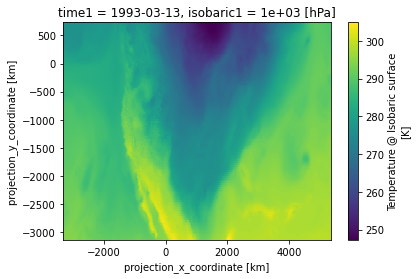

In [58]:
temps.sel(isobaric1=1000).plot()

Xarray has recognized that the DataArray object calling the plot method has two coordinate variables, and generates a 2D plot using the pcolormesh method from Matplotlib.

In this case, we are looking at air temperatures on the 1000 hPa isobaric surface over North America. We could of course improve this figure by using Cartopy to handle the map projection and geographic features!

### Summary
Xarray brings the joy of Pandas-style labeled data operations to N-dimensional data. As such, it has become a central workhorse in the geoscience community for the analysis of gridded datasets. Xarray allows us to open self-describing NetCDF files and make full use of the coordinate axes, labels, units, and other metadata. By making use of labeled coordinates, our code is often easier to write, easier to read, and more robust.

### What’s next?
Additional notebooks to appear in this section will go into more detail about

arithemtic and broadcasting with Xarray data structures

using “group by” operations

remote data access with OpenDAP

more advanced visualization including map integration with Cartopy

### Resources and references
This notebook was adapated from material in Unidata’s Python Training.

The best resource for Xarray is the Xarray documentation. See in particular

Why Xarray

Quick overview

Example gallery

Another excellent resource is this Xarray Tutorial collection.